In [1]:
!pip install tensorflow opencv-python matplotlib filetype

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.7.4
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.20.0
filetype                  1.2.0
flatbuffers               24.3.25
fonttools                 4.53.1
fqdn                      1.5.1
gast           

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.set_memory_growth(gpu,True)

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\CHARAN\AppData\Local\Temp\ipykernel_3396\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data'

In [7]:
os.listdir(data_dir)

['happy', 'sad']

In [8]:
image_exts = ['png','jpeg','jpg','bnp']

In [9]:
image_exts

['png', 'jpeg', 'jpg', 'bnp']

In [10]:
var = 0;
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in image exts {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
                print('Issue with image {}'.format(image_path))
                var +=1

print(var)

0


In [11]:
import numpy as np

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 226 files belonging to 2 classes.


In [13]:
# generates batches of 32 images
data_iterator = data.as_numpy_iterator()

In [14]:
#get anther batch from iterator
batch = data_iterator.next()

In [15]:
# images represented as arrays and their labels
len(batch)

2

In [16]:
#images as numpy arrays
batch[0]

array([[[[221.29688  , 207.29688  , 172.29688  ],
         [217.29688  , 203.29688  , 168.29688  ],
         [216.70312  , 202.70312  , 167.70312  ],
         ...,
         [254.57422  , 246.57422  , 225.57422  ],
         [253.57422  , 247.57422  , 225.57422  ],
         [255.       , 253.57422  , 231.57422  ]],

        [[218.8711   , 204.8711   , 169.8711   ],
         [214.44531  , 200.44531  , 165.44531  ],
         [214.85156  , 200.85156  , 165.85156  ],
         ...,
         [252.72266  , 244.72266  , 223.72266  ],
         [251.72266  , 245.72266  , 223.72266  ],
         [255.       , 250.72266  , 228.72266  ]],

        [[217.14844  , 203.14844  , 168.14844  ],
         [212.85156  , 198.85156  , 163.85156  ],
         [213.1289   , 199.1289   , 164.1289   ],
         ...,
         [251.       , 243.       , 222.       ],
         [250.       , 244.       , 222.       ],
         [254.1289   , 249.1289   , 227.1289   ]],

        ...,

        [[ 53.58203  ,  60.58203  ,  7

In [17]:
# 1 represents sad
# 0 represents happy
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

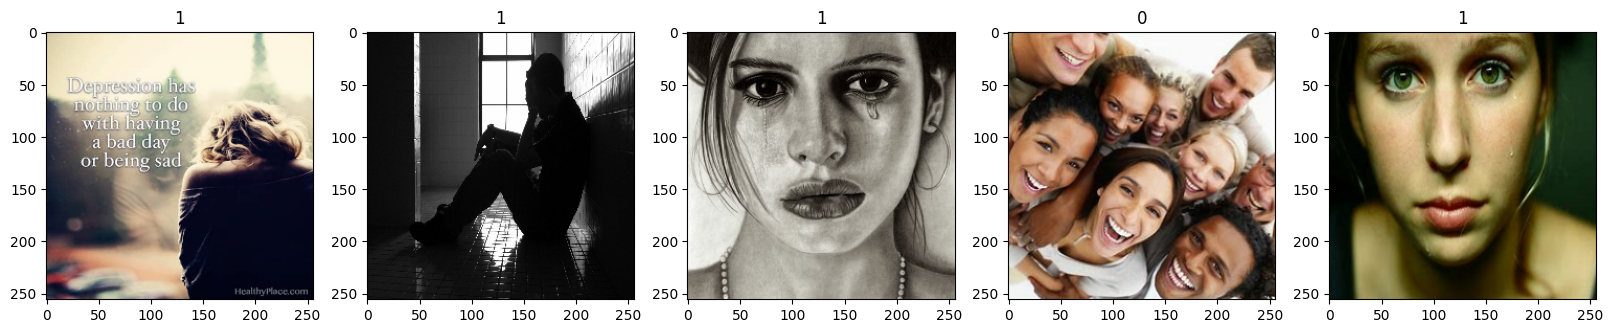

In [18]:
#plot 5 random image from batch using matplotlib
fig , ax = plt.subplots(ncols = 5,figsize = (20,20))
for idx , img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
#Preprocessing

In [20]:
#Using lambda fn to efficiently scale data such that the value lies btw 0 and 1.
data = data.map(lambda x,y : (x/255,y))

In [21]:
scaled_iterator = data.as_numpy_iterator()

In [22]:
batch = scaled_iterator.next()

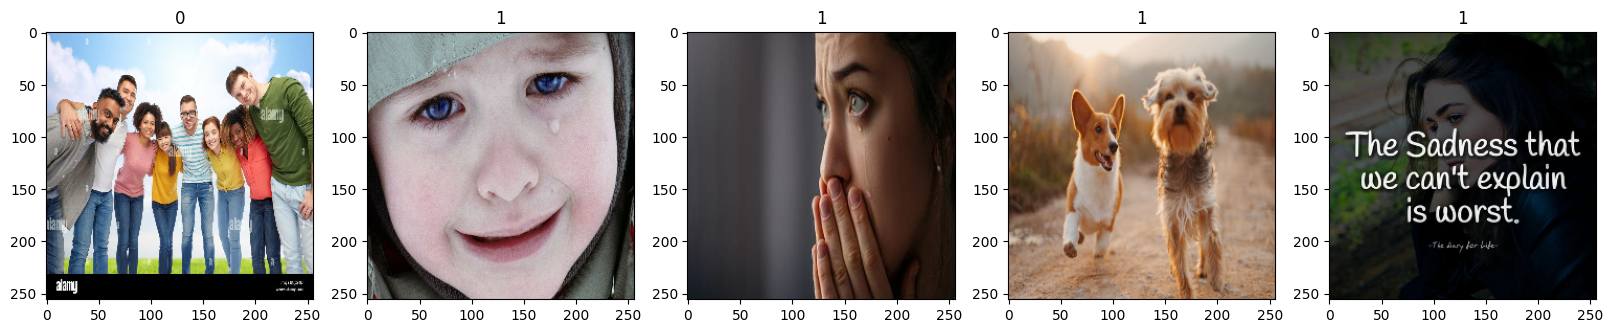

In [23]:
fig , ax = plt.subplots(ncols = 5,figsize = (20,20))
for idx , img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [24]:
len(data)

8

In [25]:
train_size =(int) (len(data)*.7)
val_size = (int) (len(data)*.2)+1
test_size = (int) (len(data)*.1)+1

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [27]:
#Model building

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [29]:
model = Sequential()

In [30]:
#LAYERS
model.add(Conv2D(16,(3,3),1,activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\CHARAN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
logdir = 'log'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 539ms/step - accuracy: 0.5797 - loss: 1.1501 - val_accuracy: 0.4531 - val_loss: 0.8075
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 492ms/step - accuracy: 0.4799 - loss: 0.7637 - val_accuracy: 0.7188 - val_loss: 0.6599
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - accuracy: 0.7187 - loss: 0.6562 - val_accuracy: 0.5781 - val_loss: 0.6466
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 458ms/step - accuracy: 0.6760 - loss: 0.6096 - val_accuracy: 0.6250 - val_loss: 0.6559
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - accuracy: 0.6681 - loss: 0.6476 - val_accuracy: 0.5938 - val_loss: 0.6356
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 438ms/step - accuracy: 0.5780 - loss: 0.6377 - val_accuracy: 0.5938 - val_loss: 0.5841
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step - accuracy: 0.7668 - loss: 0.5441 - val_accuracy: 0.7969 - val_loss: 0.5965
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - accuracy: 0.7936 - loss: 0.5121 - val_accuracy: 0.8438 - val_loss:

In [36]:
hist.history

{'accuracy': [0.543749988079071,
  0.5062500238418579,
  0.7250000238418579,
  0.675000011920929,
  0.675000011920929,
  0.6000000238418579,
  0.8187500238418579,
  0.800000011920929,
  0.8812500238418579,
  0.856249988079071,
  0.887499988079071,
  0.9125000238418579,
  0.925000011920929,
  0.9312499761581421,
  0.956250011920929,
  0.9375,
  0.9312499761581421,
  0.925000011920929,
  0.9624999761581421,
  0.9624999761581421],
 'loss': [1.1362816095352173,
  0.7315244078636169,
  0.6506129503250122,
  0.6023366451263428,
  0.6195861101150513,
  0.6070629954338074,
  0.5299709439277649,
  0.49590548872947693,
  0.4073966145515442,
  0.3037826418876648,
  0.29836857318878174,
  0.24619562923908234,
  0.1974775493144989,
  0.16748575866222382,
  0.16378112137317657,
  0.17671187222003937,
  0.17807966470718384,
  0.23552647233009338,
  0.12231050431728363,
  0.11112707853317261],
 'val_accuracy': [0.453125,
  0.71875,
  0.578125,
  0.625,
  0.59375,
  0.59375,
  0.796875,
  0.84375,
  0.

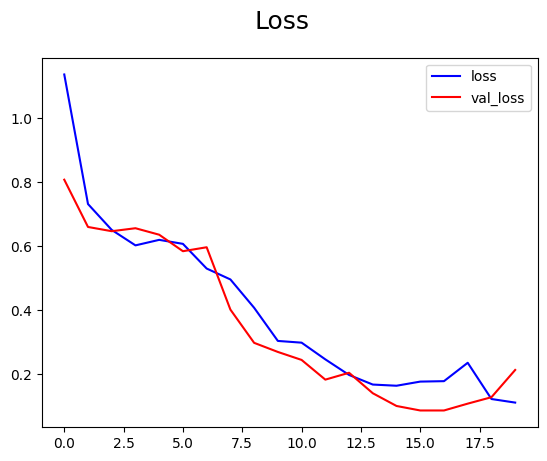

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')

fig.suptitle('Loss',fontsize=18)
plt.legend(loc='upper right')
plt.show()

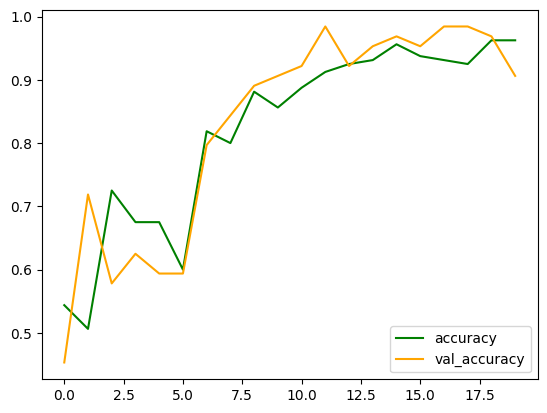

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='green',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')

plt.legend(loc='lower right')
plt.show()

In [39]:
#Performance Evaluation

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [43]:
print(f'Precission {precision.result().numpy()}, Recall {recall.result().numpy()}, Accuracy {accuracy.result().numpy()}')

Precission 0.0, Recall 0.0, Accuracy 0.5


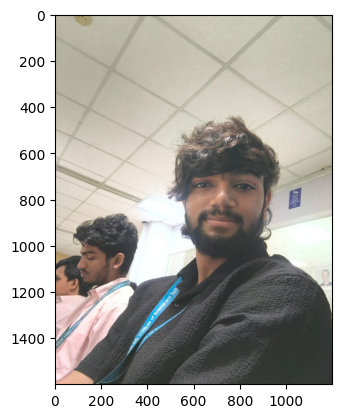

In [44]:
img = cv2.imread('happytest/f0fb45a5-2a9d-4029-a838-f85875c365c0.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

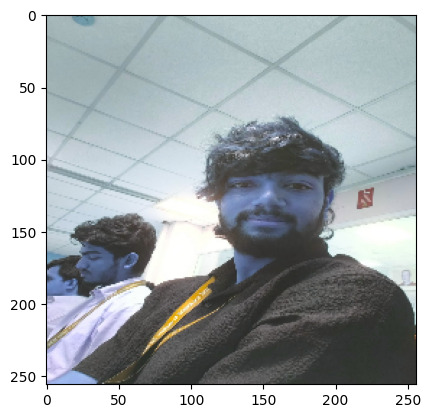

In [45]:
resize = tf.image.resize(img , (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
#nn doesnt accept single input hence we are encapsulating it into a list
np.expand_dims(resize/255,0)

array([[[[0.67375916, 0.7404259 , 0.7521906 ],
         [0.6555913 , 0.722258  , 0.7340227 ],
         [0.6627451 , 0.7294118 , 0.7411765 ],
         ...,
         [0.64260113, 0.7210325 , 0.72495407],
         [0.664905  , 0.7433364 , 0.74725795],
         [0.64790136, 0.7263327 , 0.7302543 ]],

        [[0.6589461 , 0.72561276, 0.73737746],
         [0.6574755 , 0.72414213, 0.73590684],
         [0.6622549 , 0.7289216 , 0.7406863 ],
         ...,
         [0.6504902 , 0.7289216 , 0.73284316],
         [0.6486673 , 0.72709864, 0.7310202 ],
         [0.65628064, 0.734712  , 0.7386336 ]],

        [[0.6402727 , 0.70693934, 0.71870404],
         [0.6648284 , 0.7314951 , 0.7432598 ],
         [0.65157783, 0.7182445 , 0.7300092 ],
         ...,
         [0.66116726, 0.73959863, 0.7435202 ],
         [0.6509804 , 0.7294118 , 0.73333335],
         [0.6413909 , 0.7198223 , 0.72374386]],

        ...,

        [[0.726394  , 0.7141391 , 0.8656097 ],
         [0.74643075, 0.7302543 , 0.8900582 ]

In [47]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[0.68983173]], dtype=float32)

In [48]:
if yhat > 0.5 :
    print(f'Predicted class is sad')
else :
    print(f'Predicted class is happy')

Predicted class is sad


In [49]:
#SAving MOdel

In [50]:
from tensorflow.keras.models import load_model

In [51]:
model.save(os.path.join('models','happysadClassifier.h5'))

In [52]:
new_model = load_model(os.path.join('models','happysadClassifier.h5'))

In [53]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [54]:
if yhat_new > 0.5 :
    print(f'Predicted class is sad')
else :
    print(f'Predicted class is happy')

Predicted class is sad
